<a href="https://colab.research.google.com/github/josemcriadoc-jmc/Regresion_Lineal/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 3: Regresión Lineal y Conceptos Fundamentales




## Instrucciones Generales

**Fecha de entrega:** 20 de septiembre.
**Tiempo disponible:** Tienen dos clases y el fin de semana para completar el taller.

1.  **Trabajo en Grupo:** Este taller se debe realizar en los grupos previamente definidos.
2.  **Repositorio en GitHub:** Cada grupo debe crear un repositorio en GitHub.
    * Una sola persona del grupo es responsable de crearlo.
    * El repositorio debe llamarse **`Regresion_Lineal`**.
    * Este archivo debe ser subido al repositorio con el nombre **`Regresion_Lineal.ipynb`**.
    * **Alternativa:** Si tienen complicaciones con GitHub, pueden enviar el enlace del cuaderno de Google Colab al aula virtual.
3.  **Actividad a Mano (20% de la nota):**
    * La asistencia a clase es **obligatoria**.
    * Se realizará una actividad práctica de regresión lineal a mano.
    * Cada integrante del grupo deberá firmar la hoja de la actividad, la cual constituye el 20% de la nota de este taller.

---

## **Parte 1: Definición del Problema**

Piensa en tu experiencia académica o laboral en un área de operaciones y elige **un problema** relacionado con inventarios, calidad, mantenimiento o productividad.

1.  Indica cuál es tu variable dependiente **$Y$** (aquello que quieres predecir o clasificar).
2.  Lista entre 3 y 5 variables independientes **$X$** que medirías para predecir $Y$.
3.  Especifica si tu problema es de **regresión** (predecir un valor numérico) o de **clasificación**.

**Respuesta (escribe aquí):**


**Respuesta 1:** Desde la empresa en la que trabajo el mayor desafio es mantener un nivel óptimo de inventario mensual de cada medicamento en cada centro de distribución.


**Respuesta 2:**
 1. Demanda histórica mensual del medicamento vendidas y distribuidas
 2. Tiempo de entrega del proveedor
 3. Vida útil restante del medicamento
 4. Variabilidad de la demanda
 5. Cantidad de inventario actual en el centro de distribución

**Respuesta 3:** Regresión, porque se busca predecir un valor numérico, que es el ivel óptimo de inventario por medicamento

---

## **Parte 2: Preprocesamiento de Datos y *Leakage***

Basado en el caso que definiste en la Parte 1:

1.  Lista entre 3 y 5 **transformaciones** que aplicarías a tus datos (ej. imputación de valores faltantes, codificación de variables categóricas, escalado, creación de *lags*, etc.) y **justifica por qué** cada una es necesaria.
2.  Señala un posible riesgo de ***data leakage*** (fuga de datos) en tu plan y explica cómo lo evitarías usando un *pipeline* de preprocesamiento.

**Respuesta (escribe aquí):**

**PROCESAMIENTO DE DATOS Y LEAKAGE**

1. **Imputación de valores faltantes:** Algunas variables, como la demanda histórica o el tiempo de entrega, pueden tener datos faltantes por reportes incompletos o retrasos en el registro. Rellenar estos valores con la media, mediana o interpolación evita que los modelos fallen o tengan sesgos

2. **Creación de lags (rezagos) de la demanda histórica:** La demanda de un medicamento suele depender de su consumo en meses anteriores. Crear lags  permite al modelo capturar patrones estacionales y tendencias temporales.

3. **Escalado de variables numéricas:** Variables como tiempo de entrega y vida útil pueden estár en escalas distintas. Escalarlas ayuda a que modelos basados en distancia o gradientes converjan mejor y no se sesguen por magnitudes diferentes.

4. **Codificación de variables categóricas:** Se pueden incluir variables como centro de distribución o tipo de medicamento, los modelos de ML no pueden interpretar texto. Se usa one-hot encoding o target encoding según convenga.

5. **Detección y tratamiento de outliers:** Picos de demanda atípicos o errores de registro que afecten la predicción del nivel óptimo de inventario. Identificar y manejar estos valores ayuda a la estabilidad del modelo.


**RIESGO DE DATA LEAKAGE**

1. **Fuga de datos:** Usar variables que dependen del futuro, como el inventario final del mes o ventas que ocurren después de la predicción, puede introducir información que el modelo no tendría en la vida real, entonces, implementar un pipeline de preprocesamiento donde todas las transformaciones se calculan solo con datos del pasado o presentes, como al crear lags o imputar valores, usar únicamente información de meses anteriores al mes que se desea predecir y no incluir datos de demanda futura ni inventario final futuro durante el entrenamiento.


---

## **Parte 3: Interpretación y Métricas de Regresión Simple**

Para esta sección, elige un caso simple de regresión (puede ser el tuyo o uno hipotético, como predecir la demanda de un producto según su precio).

1.  Define claramente las variables **$Y$** y **$X$** junto con sus **unidades** (ej. $Y$: número de unidades vendidas, $X$: precio en dólares).
2.  Supón que entrenas un modelo y obtienes una pendiente de **$\hat{\beta}_1 = -0.6$**. Escribe una interpretación clara y concisa de este coeficiente en el contexto de tu problema.
3.  ¿Qué **métrica** de evaluación usarías (MAE, RMSE, o MAPE) y **por qué** es la más adecuada para tu caso?
4.  Menciona **un supuesto** del modelo de regresión lineal que validarías (ej. linealidad, homocedasticidad) y explica **cómo** lo harías (usando un gráfico o una prueba estadística).

**Respuesta (escribe aquí):**

1. **Variables:**
Y: Demanda mensual del medicamento X: Precio de venta del medicamento por unidad

2. Por cada incremento de 1 peso en el precio del medicamento, la demanda mensual disminuya en 0.6 unidades, osea, una relación negativa entre precio y demanda, como sucede en muchos productos farmacéuticos.

3. **MAE:** Ya que mide el error promedio absoluto en unidades, lo que facilita la interpretación práctica para la gestión de inventarios.

4. Se valuaría la linealidad, el modelo asume que la relación entre precio y demanda es lineal, por lo cual, se graficaría un scatter plot de Y vs X y se superpone la línea de regresión, allí se observa si los puntos se distribuyen alrededor de la línea recta sin patrones. Si se detectan curvas o patrones no lineales, considerar una transformación de la variable X o un modelo no lineal

---

## **Parte 4: Regresión Múltiple y Colinealidad**

Volviendo a tu caso de la Parte 1 (con múltiples variables).

1.  Escribe el **vector de variables** $\vec{X}$ y la **respuesta** $Y$.
2.  Explica cómo interpretarías el **coeficiente** de una de tus variables clave (incluyendo unidades y el sentido de la relación: positiva o negativa).
3.  Si sospecharas que existe **colinealidad** entre tus variables, menciona **dos acciones** que podrías tomar para mitigarla.

**Respuesta (escribe aquí):**


**Regresión Múltiple y Colinealidad**

1. **Variables**

$$
\mathbf{X} =
\begin{bmatrix}
\text{Demanda histórica mensual (unidades)} \\
\text{Tiempo de entrega del proveedor (días)} \\
\text{Vida útil restante del medicamento (días)} \\
\text{Variabilidad de la demanda (desviación estándar unidades)} \\
\text{Inventario inicial en el centro de distribución (unidades)}
\end{bmatrix}
$$


Y = Nivel óptimo de inventario mensual



2. **Interpretación de un demanda histórica mensual si $\hat{\beta}_1 = 0.8$:** Por cada aumento de 1 unidad en la demanda histórica mensual, el nivel óptimo de inventario aumentaría en 0.8 unidades, manteniendo, osea que habría una relación positiva, lo cual tiene sentido, a mayor demanda pasada, se debe mantener más inventario para satisfacerla.


3. Algunas variables pueden estar altamente correlacionadas, por ejemplo:

  * Demanda histórica mensual y variabilidad de la demanda.
  * Inventario inicial y demanda histórica.

La colinealidad puede inflar la varianza de los coeficientes y hacer que las estimaciones sean inestables.Para mitigarlas se puede hacer uso de técnicas de regularización como Ridge o Lasso que  penalizan los coeficientes y reducen el efecto de la colinealidad sin eliminar variables.



---

## **Parte 5: Interacciones y Multicolinealidad (VIF)**

1.  Plantea un caso con una variable $Y$ y entre 4 y 6 variables $X$. ¿Qué término de **interacción** entre dos variables podrías añadir al modelo y **por qué** crees que sería útil?
2.  Si al calcular el Factor de Inflación de la Varianza (VIF) para una variable, obtienes un valor alto (ej. > 10), menciona **dos acciones** que podrías tomar para solucionarlo.

**Respuesta (escribe aquí):**

1. Para una variable Y= Nivel óptimo d einventario mensual se plantean las siguientes variables X

* Demanda histórica mensual del medicamento

* Tiempo de entrega del proveedor

* Vida útil restante del medicamento

* Variabilidad de la demanda

* Inventario inicial en el centro de distribución

* Costo de almacenamiento por unidad

Una interacción deseada sería entre la demanda histórica x la variabilidad de la demanda. Útil porque permite capturar el efecto combinado de alta demanda y alta variabilidad en los niveles de inventario. Si se ve desde términos prácticos un medicamento con alta volatilidad y demanda puede requerir un mayor inventario que si se considerara cada variable de forma individual.

2. Si calcular el VIF para una variable como podría ser la Demanda histórica indicaría colinealidad con otras variables. Para solucionarlo se puede combinar 2 variables en un índice único, o se puede realizar una regularización con Ridge o Lasso, donde no es necesario eliminar las variables.




---

## **Parte 6: Variables Categóricas e Interacciones**

1.  Define una **variable categórica** para tu caso (puedes inventarla si no la tenías). Elige una de sus categorías como el nivel **base** o de referencia y **justifica** tu elección.
2.  Crea una **interacción** entre una variable numérica y la variable categórica que definiste. Explica cómo se interpretaría el coeficiente de esta interacción.

**Respuesta (escribe aquí):**
1. Para la variable de tipo de medicamento, se tendrían las siguientes categorías:

* Medicamento de alta prioridad

* Medicamento de prioridad media

* Medicamento de baja prioridad

Se elegiría la categoría de baja prioridad como referencia porque es la menos crítica. Así, los coeficientes de las otras categorías reflejarán el cambio en inventario respecto a la categoría menos prioritaria, lo que es más intuitivo para la gestión de inventarios.

2. Las variables para la interacción serían  Demanda histórica x Alta prioridad

De esta forma la interacción puede mostrar como el efecto de la demanda histórica sobre el inventario cambia segun el tipo de medicamento, si se tuviese un pendiente con relación positiva, cada unidad adicional de demanda histórica incrementaría el nivel óptimo de inventario, para los medicamentos de alta prioridad,

---

## **Parte 7: Conceptos Clave de Clasificación**

Aunque el taller se centra en regresión, estos conceptos son fundamentales en Machine Learning.

1.  Explica qué es la **curva ROC** y para qué se utiliza en un problema de clasificación.
2.  Define el concepto de **accuracy** (exactitud) y menciona una situación en la que podría ser una métrica engañosa.
3.  Describe qué es una **matriz de confusión** y cómo se interpretan sus componentes (Verdaderos Positivos, Falsos Positivos, Verdaderos Negativos, Falsos Negativos).

1. La curva ROC, o Receiver Operating Characteristic, es una herramienta que se utiliza en problemas de clasificación para evaluar qué tan bien un modelo distingue entre clases positivas y negativas. En esta curva, el eje horizontal representa la tasa de falsos positivos, mientras que el eje vertical representa la tasa de verdaderos positivos. La idea es observar cómo cambia la sensibilidad del modelo a medida que se ajusta el umbral de decisión. Mientras más cerca se encuentre la curva de la esquina superior izquierda, mejor es el desempeño del modelo, y el área bajo la curva (AUC) sirve como una medida resumida de su capacidad discriminativa: un AUC cercano a 1 indica un modelo excelente para separar las clases.

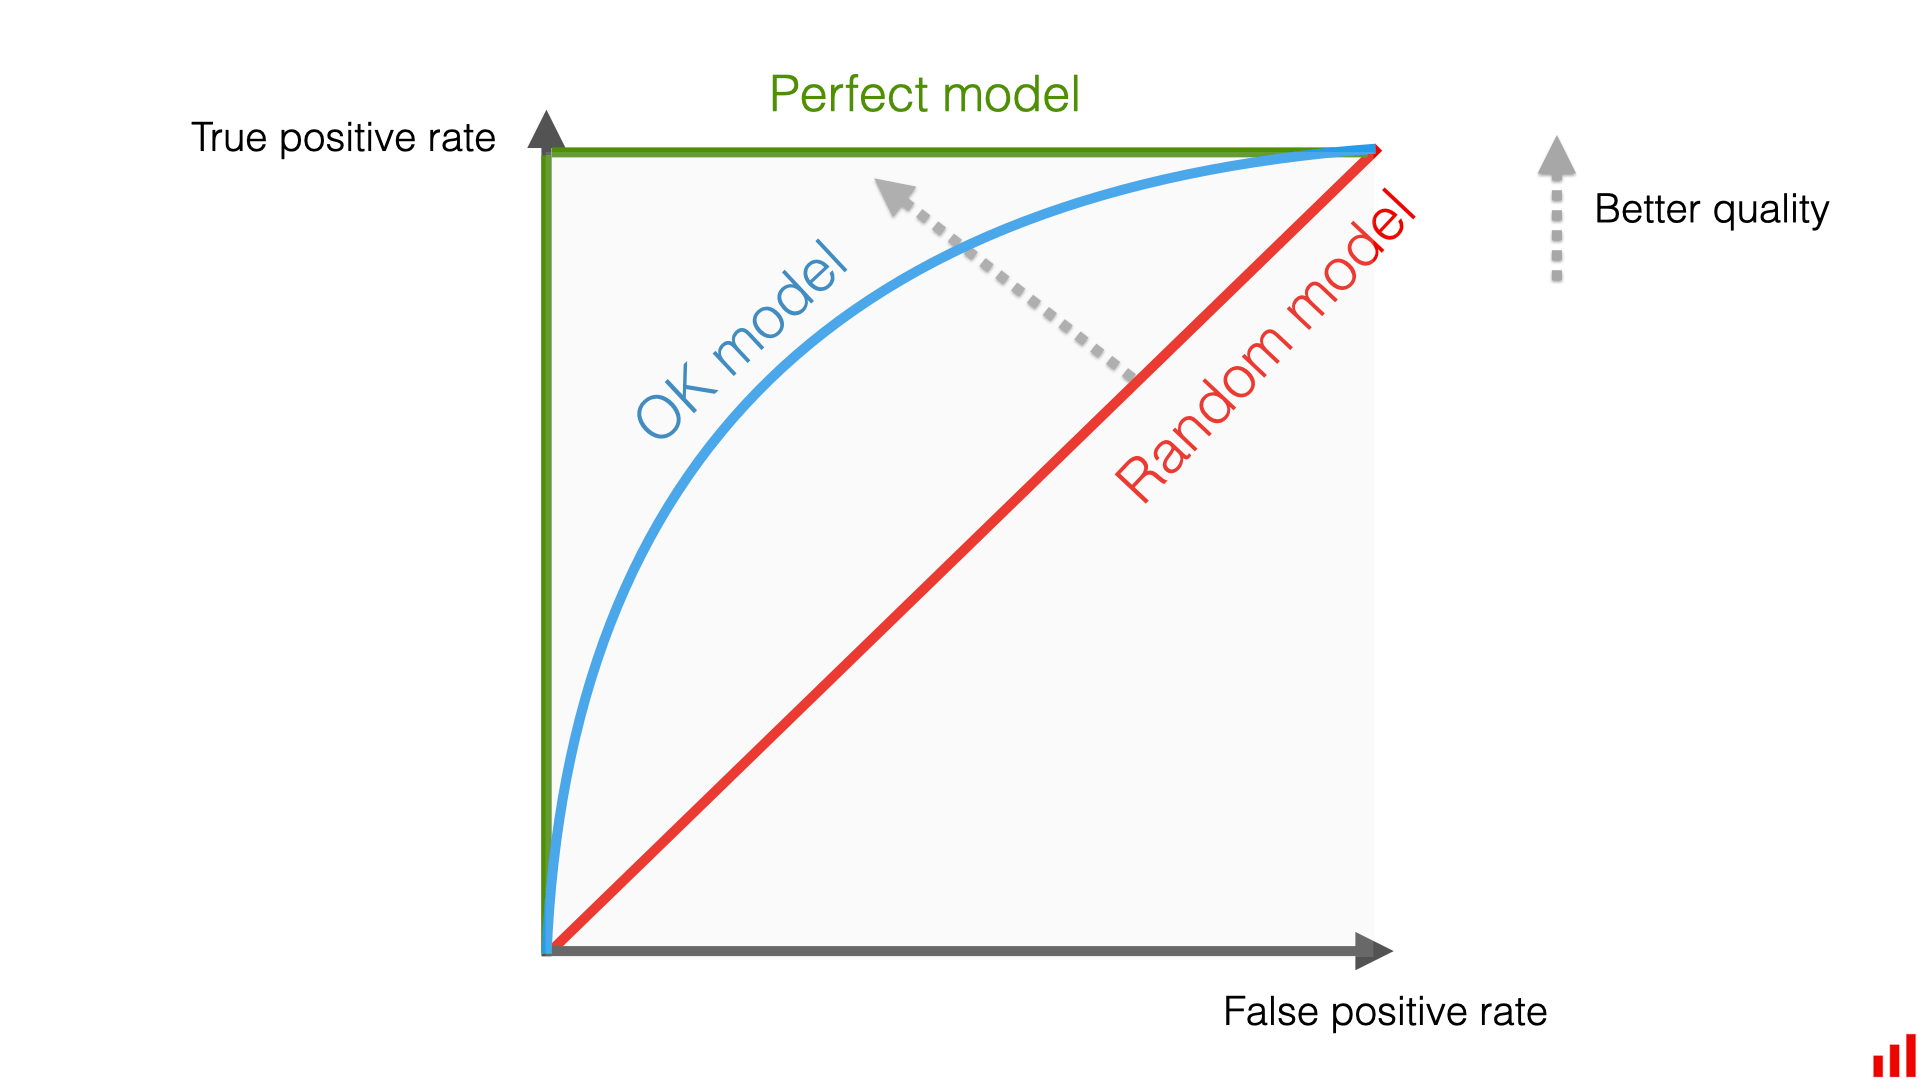

2. El accuracy, o exactitud, es la proporción de predicciones correctas que hace un modelo sobre el total de predicciones. Por ejemplo, si un modelo predice correctamente 90 de 100 casos, su accuracy es del 90%. Aunque esta métrica es fácil de interpretar, puede ser engañosa en situaciones de clases desbalanceadas. Si la mayoría de los casos pertenecen a una sola clase, un modelo que siempre predice esa clase obtendría un accuracy alto, pero en realidad no estaría identificando correctamente los casos minoritarios, que muchas veces son los más importantes.

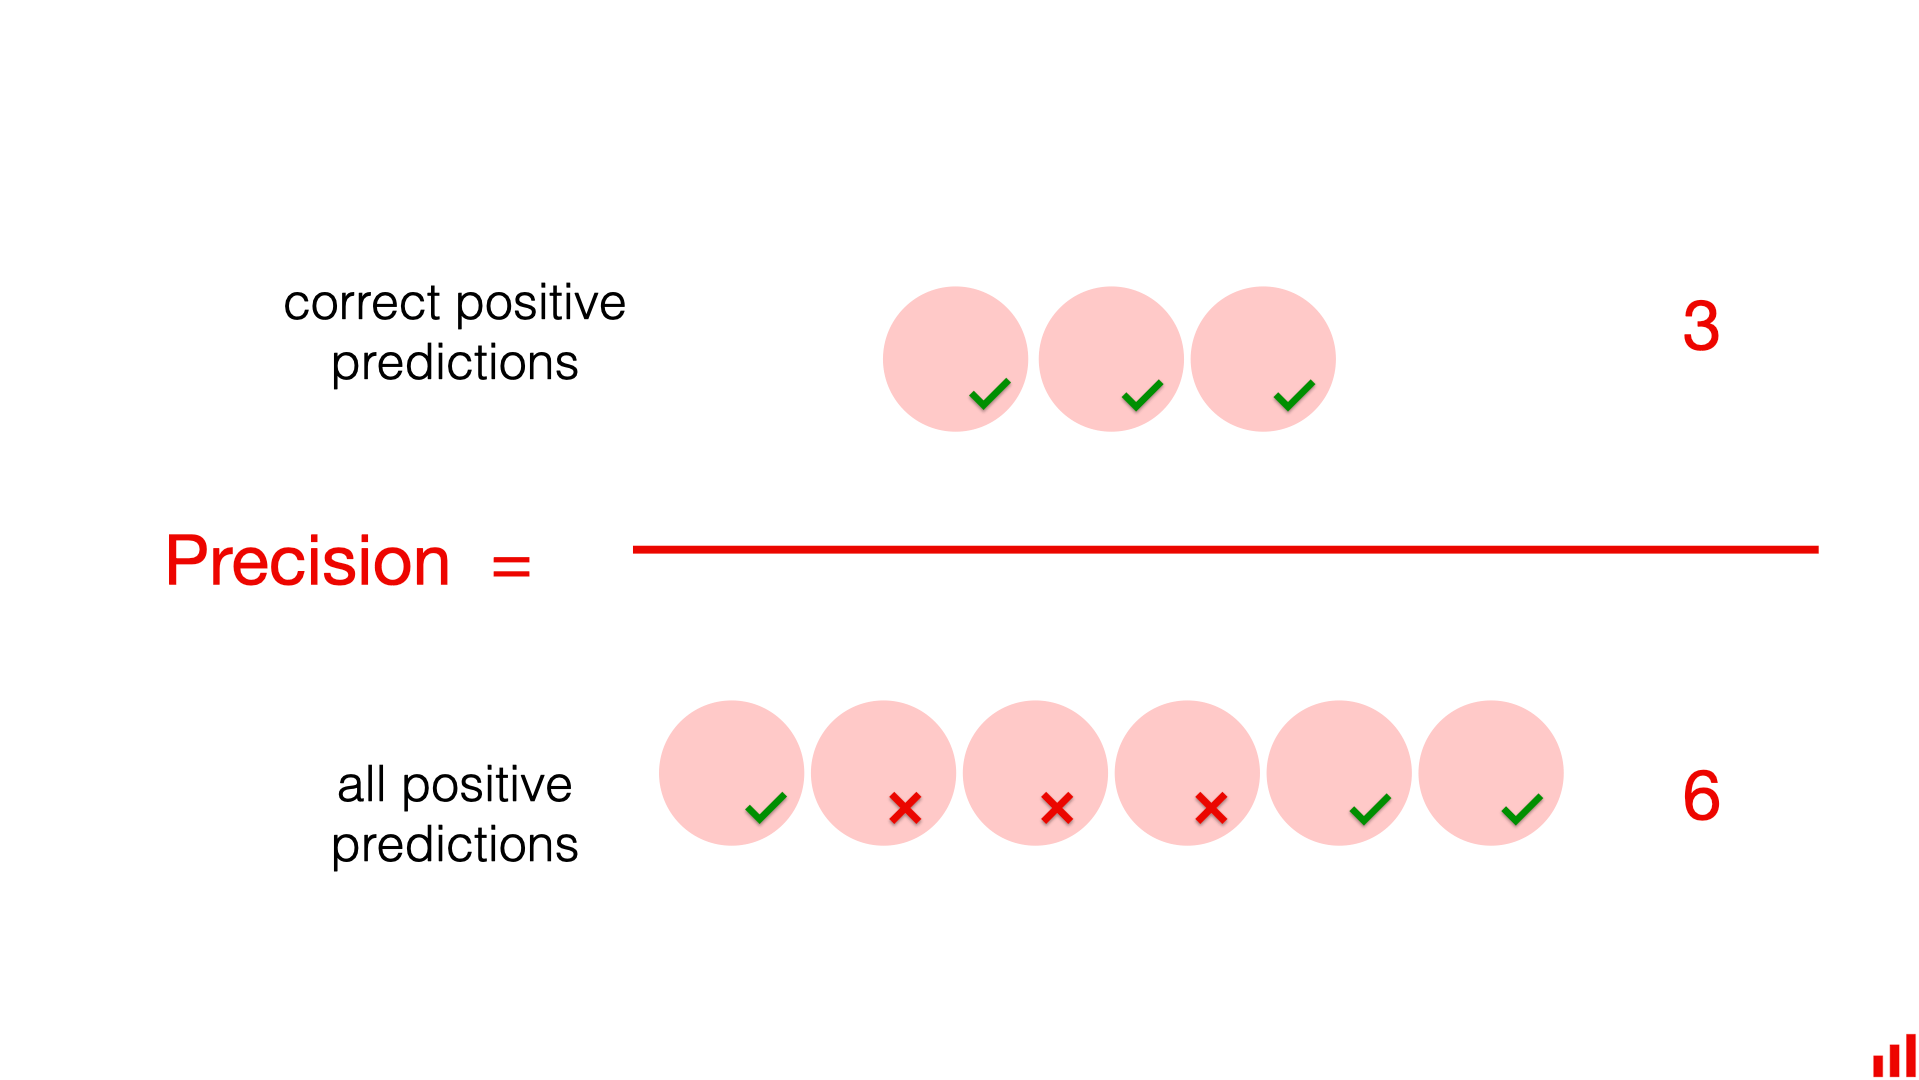

3. La matriz de confusión es otra herramienta clave que permite analizar con mayor detalle el desempeño de un modelo de clasificación. Es una tabla que cruza los valores reales con las predicciones del modelo, dividiendo los resultados en cuatro categorías: Verdaderos Positivos TP, Falsos Positivos FP, Verdaderos Negativos TN y Falsos Negativos FN. Los Verdaderos Positivos son los casos positivos que el modelo predijo correctamente, mientras que los Falsos Positivos son los negativos que fueron clasificados incorrectamente como positivos. Los Verdaderos Negativos representan los negativos correctamente identificados, y los Falsos Negativos son los positivos que el modelo no logró detectar. Esta matriz permite calcular métricas más completas como sensibilidad, precisión y F1-score, las cuales ofrecen una evaluación más completa que el simple accuracy, especialmente cuando las clases están desbalanceadas.
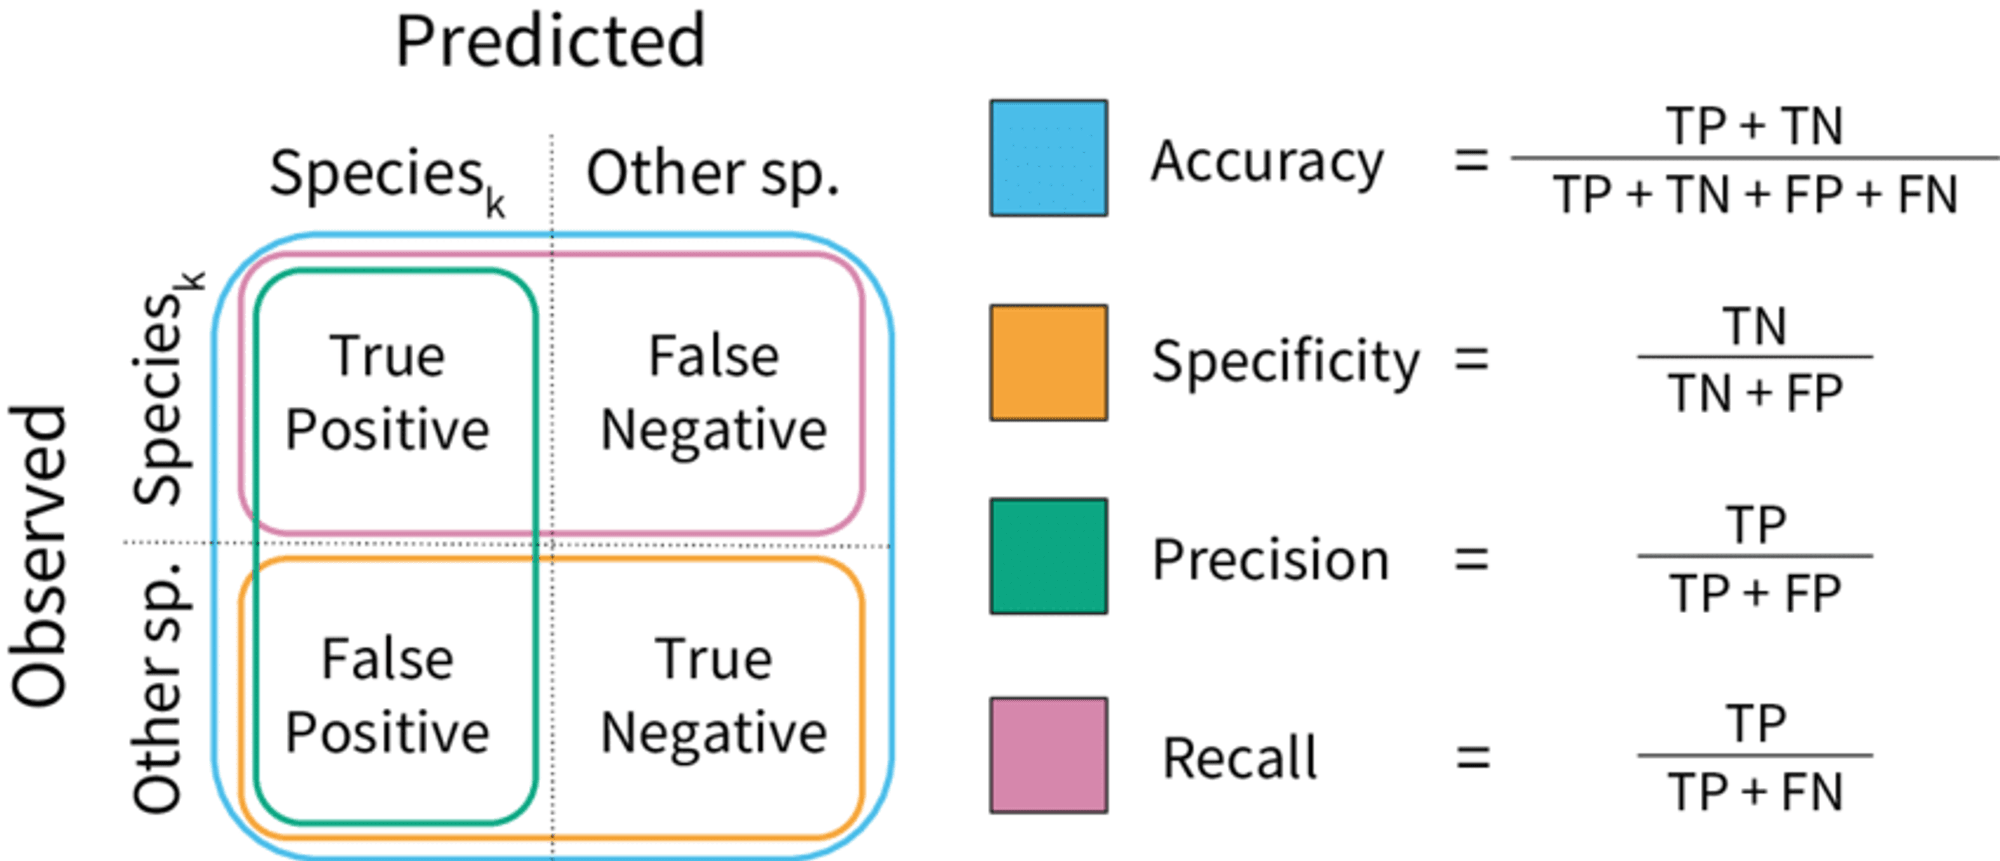
